## CPSC 483-01 Project 5
***
**Name:** Tianzheng Li <br><br>
*All 8 experiments are functional and completed*

*Minor issue* The first data is read in as the labels rather than as part of the data, which I failed to notice till later on. As a result I decided to leave the bug in as it has little effect on the actual experiments. As a result, the datasets are 199 in length, rather than 200. 

# 1. Read data
***
Read the data using `read_csv()`.

In [1]:
import pandas as pd

# Import from csv
data1 = pd.read_csv('dataset1.csv')
data2 = pd.read_csv('dataset2.csv')
data3 = pd.read_csv('dataset3.csv')

# 2. Logistic regression score for dataset 1
***
The R^2 score for dataset 1 is `1.0`, meaning that the regression is a good fit for the data.

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Dataset 1
d1_col1 = '1.8005387353055742'
d1_col2 = '-0.5392180610512733'
d1_col3 = '0'

d1_X = []
d1_y = []
for i in range(len(data1)):
    d1_X.append([data1[d1_col1][i], data1[d1_col2][i]])
    d1_y.append(data1[d1_col3][i])
d1_X = np.array(d1_X)
d1_y = np.array(d1_y)

# Logistic Regresion
lr1 = LogisticRegression(random_state=0).fit(d1_X, d1_y)
d1_score = lr1.score(d1_X, d1_y)
print("\033[1mDataset 1 R^2 score: \033[0m" + str(d1_score))

Dataset 1 R^2 score: 1.0


# 3. Logistic regression score for dataset 2
***
The R^2 score for data set 2 is `0.543`, meaning that the regression is not as good of a fit for the second dataset compared to the first.

In [3]:
# Dataset 2
d2_col1 = '-1.6644070030229474'
d2_col2 = '17.24541535537469'
d2_col3 = '0'

d2_X = []
d2_y = []
for i in range(len(data2)):
    d2_X.append([data2[d2_col1][i], data2[d2_col2][i]])
    d2_y.append(data2[d2_col3][i])
d2_X = np.array(d2_X)
d2_y = np.array(d2_y)

# Logistic Regresion
lr2 = LogisticRegression(random_state=0).fit(d2_X, d2_y)
d2_score = lr2.score(d2_X, d2_y)
print("\033[1mDataset 2 R^2 score: \033[0m" + str(d2_score))

Dataset 2 R^2 score: 0.542713567839196


# 4. Scatterplots
***
After plotting the datasets 1 and 2 into scatterplots we can see that that dataset 1 had a score of `1.0` due to it's more linear nature, as dataset 2 appears to be circular rather than linear.

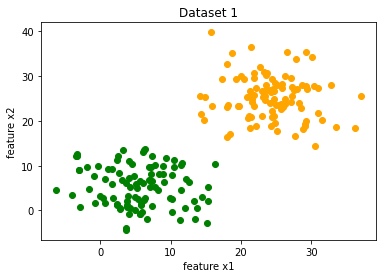

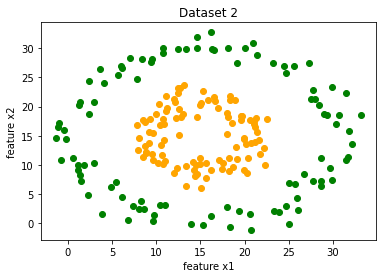

In [4]:
import matplotlib.pyplot as plt

# Dataset 1
for i in range(len(data1)):
    if data1[d1_col3][i] == 0:
        plt.plot(data1[d1_col1][i], data1[d1_col2][i], 'o', color = 'green')
    else:
        plt.plot(data1[d1_col1][i], data1[d1_col2][i], 'o', color = 'orange')
plt.title("Dataset 1")
plt.xlabel("feature x1")
plt.ylabel("feature x2")
plt.show()

# Dataset 2
for i in range(len(data2)):
    if data2[d2_col3][i] == 0:
        plt.plot(data2[d2_col1][i], data2[d2_col2][i], 'o', color = 'green')
    else:
        plt.plot(data2[d2_col1][i], data2[d2_col2][i], 'o', color = 'orange')
plt.title("Dataset 2")
plt.xlabel("feature x1")
plt.ylabel("feature x2")
plt.show()

# 5. Naive Bayes Classifier
***
The Naive Bayes R^2 score for both dataset 1 and 2 is `1.0`, which implies that it is a good predictor for both of the data.

In [5]:
from sklearn.naive_bayes import GaussianNB

# Dataset 1
d1_gnb = GaussianNB()
d1_bayes = d1_gnb.fit(d1_X, d1_y)
d1_bayesscore = d1_gnb.score(d1_X, d1_y)
print("\033[1mDataset 1 Bayes R^2 score: \033[0m" + str(d1_bayesscore))

# Dataset 2
d2_gnb = GaussianNB()
d2_bayes = d2_gnb.fit(d2_X, d2_y)
d2_bayesscore = d2_gnb.score(d2_X, d2_y)
print("\033[1mDataset 2 Bayes R^2 score: \033[0m" + str(d2_bayesscore))

Dataset 1 Bayes R^2 score: 1.0
Dataset 2 Bayes R^2 score: 1.0


# 6. K-Nearest Neighbors
***
The K-Nearest Neighbors R^2 score for both dataset 1 and 2 is `1.0`, which implies that it is a good predictor for both of the data.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Dataset 1
d1_neigh = KNeighborsClassifier()
d1_neigh.fit(d1_X, d1_y)
d1_neighscore = d1_neigh.score(d1_X, d1_y)
print("\033[1mDataset 1 neighbors R^2 score: \033[0m" + str(d1_neighscore))

# Dataset 2
d2_neigh = KNeighborsClassifier()
d2_neigh.fit(d2_X, d2_y)
d2_neighscore = d2_neigh.score(d2_X, d2_y)
print("\033[1mDataset 2 neighbors R^2 score: \033[0m" + str(d2_neighscore))

Dataset 1 neighbors R^2 score: 1.0
Dataset 2 neighbors R^2 score: 1.0


# 7. Decision boundaries for Dataset 1 and 2
***
After plotting the decision boundaries for all 3 classifiers we see that for dataset 1 any of the 3 worked find due to the data having a clear linear separation <br>
For dataset 2 we can see that, like we determined before, that logistic regression did not fit very well since it is not linear. On the other hand the other two fit fairly well as it emulates the circular nature of the data.

In [7]:
# Decision Surface code from KV Subbaiah Setty at hackernoon.com
def dec_surf(X, y, model, title):
    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    
    # make predictions for the grid
    yhat = model.predict(grid)
    
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
        
    # labels
    plt.title(title)
    plt.xlabel("feature x1")
    plt.ylabel("feature x2")
    plt.show()

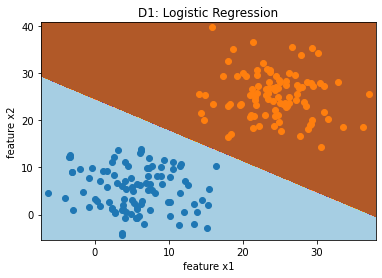

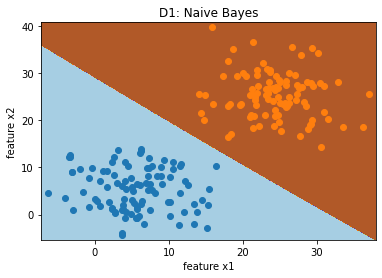

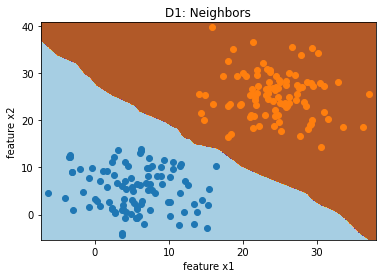

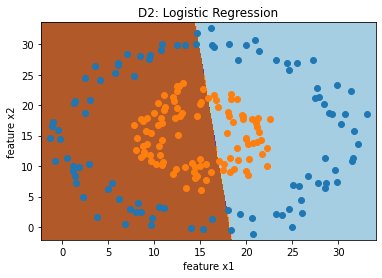

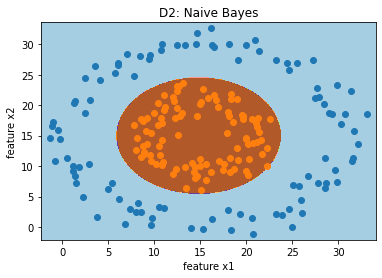

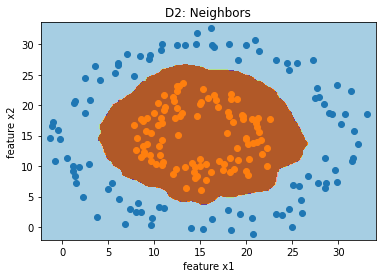

In [8]:
from sklearn.metrics import accuracy_score

# Dataset 1 
dec_surf(d1_X, d1_y, lr1, "D1: Logistic Regression")
dec_surf(d1_X, d1_y, d1_gnb, "D1: Naive Bayes")
dec_surf(d1_X, d1_y, d1_neigh, "D1: Neighbors")

# Dataset 2 
dec_surf(d2_X, d2_y, lr2, "D2: Logistic Regression")
dec_surf(d2_X, d2_y, d2_gnb, "D2: Naive Bayes")
dec_surf(d2_X, d2_y, d2_neigh, "D2: Neighbors")

# 8. Dataset 3
***
The corresponding scores for the classifiers are consistent when we take a look at the decision boundaries. The shape of the data seems to work fairly well with a linear boundary, as the R^2 scores are around 80%, however we get a much better boundary with the K-Nearest Neighbors, as it fits all the data and follows the S-shape pattern.

Dataset 3 LogReg R^2 score: 0.8693467336683417
Dataset 3 Bayes R^2 score: 0.8844221105527639
Dataset 3 neighbors R^2 score: 1.0


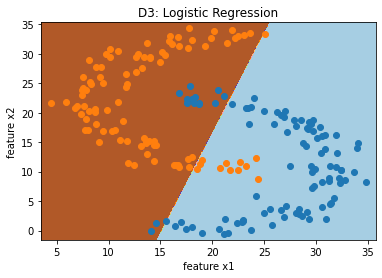

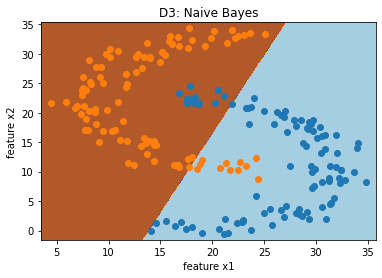

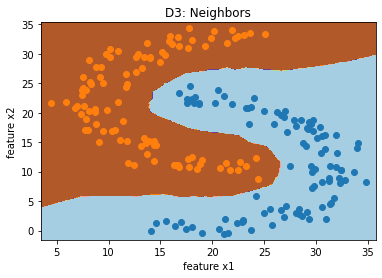

In [9]:
# Dataset 3
d3_col1 = '30.876149283835716'
d3_col2 = '7.806792944703234'
d3_col3 = '0'

d3_X = []
d3_y = []
for i in range(len(data3)):
    d3_X.append([data3[d3_col1][i], data3[d3_col2][i]])
    d3_y.append(data3[d3_col3][i])
d3_X = np.array(d3_X)
d3_y = np.array(d3_y)

# Logistic Regresion
lr3 = LogisticRegression(random_state=0).fit(d3_X, d3_y)
d3_score = lr3.score(d3_X, d3_y)
print("\033[1mDataset 3 LogReg R^2 score: \033[0m" + str(d3_score))

# Bayes
d3_gnb = GaussianNB()
d3_bayes = d3_gnb.fit(d3_X, d3_y)
d3_bayesscore = d3_gnb.score(d3_X, d3_y)
print("\033[1mDataset 3 Bayes R^2 score: \033[0m" + str(d3_bayesscore))

# Neighbors
d3_neigh = KNeighborsClassifier()
d3_neigh.fit(d3_X, d3_y)
d3_neighscore = d3_neigh.score(d3_X, d3_y)
print("\033[1mDataset 3 neighbors R^2 score: \033[0m" + str(d3_neighscore))

# Decision boundaries
dec_surf(d3_X, d3_y, lr3, "D3: Logistic Regression")
dec_surf(d3_X, d3_y, d3_gnb, "D3: Naive Bayes")
dec_surf(d3_X, d3_y, d3_neigh, "D3: Neighbors")